# 4. Measures for In-Sample Evaluation



In-sample evaluation refers to the process of assessing the performance of a machine learning model using the same data that was used for training the model. It is important to distinguish in-sample evaluation from out-of-sample evaluation, where the model is tested on new, unseen data.

Several measures are commonly used for in-sample evaluation to understand how well the model fits the training data. Some of the key measures include:

1. **Mean Squared Error (MSE):** MSE calculates the average squared difference between the predicted values and the actual values in the training data. It quantifies the overall error of the model's predictions, with lower values indicating better performance.

2. **R-squared (R^2) Coefficient:** R-squared measures the proportion of the variance in the target variable that is explained by the model's predictions. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

3. **Residual Analysis:** Residuals are the differences between the actual and predicted values. Analyzing residuals helps identify patterns or trends in the model's errors, such as heteroscedasticity or systematic biases.

4. **Mean Absolute Error (MAE):** MAE calculates the average absolute difference between the predicted and actual values. It provides a measure of the model's average prediction accuracy.

5. **Root Mean Squared Error (RMSE):** RMSE is the square root of the MSE and provides a more interpretable measure of the model's prediction error in the original units of the target variable.

6. **Coefficient of Determination (Adjusted R-squared):** Adjusted R-squared is a modified version of R-squared that penalizes the inclusion of irrelevant features in the model. It helps in determining if adding more features improves the model's performance significantly.

It is essential to keep in mind that in-sample evaluation may not accurately reflect the model's performance on unseen data. Overfitting, where the model performs exceptionally well on the training data but poorly on new data, is a common concern with in-sample evaluation. Therefore, out-of-sample evaluation using a separate test dataset is crucial to obtain a more reliable assessment of the model's generalization performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Example data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature: Independent variable (e.g., highway-mpg)
Y = np.array([10, 20, 30, 40, 50])  # Target: Dependent variable (e.g., price)

In [3]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [4]:
Y

array([10, 20, 30, 40, 50])

In [6]:

from sklearn.model_selection import train_test_split

# Split the data into training and test sets (for out-of-sample evaluation)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lm = LinearRegression()
lm

LinearRegression()

In [8]:
# Fit the model on the training data
lm.fit(X_train, Y_train)

LinearRegression()

In [9]:
# Predict the target variable on the training data
Y_train_pred = lm.predict(X_train)
Y_train_pred

array([50., 30., 10., 40.])

In [10]:
# Predict the target variable on the test data
Y_test_pred = lm.predict(X_test)
Y_test_pred

array([20.])

In [11]:
# Import necessary libraries for errors

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**Mean Squared Error (MSE)**

In [12]:
# Mean Squared Error (MSE) 
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
print("MSE (Training):", mse_train)
print("MSE (Test):", mse_test)

MSE (Training): 3.155443620884047e-29
MSE (Test): 5.048709793414476e-29


**Mean Absolute Error (MAE)**

In [13]:
# Mean Absolute Error (MAE) 
mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
print("MAE (Training):", mae_train)
print("MAE (Test):", mae_test)

MAE (Training): 3.552713678800501e-15
MAE (Test): 7.105427357601002e-15


#### Root Mean Squared Error (RMSE) 

In [14]:
# Root Mean Squared Error (RMSE) 
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE (Training):", rmse_train)
print("RMSE (Test):", rmse_test)

RMSE (Training): 5.617333549722722e-15
RMSE (Test): 7.105427357601002e-15


#### R-squared (R^2) 

In [15]:
# R-squared (R^2) 
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)
print("R^2 (Training):", r2_train)
print("R^2 (Test):", r2_test)


R^2 (Training): 1.0
R^2 (Test): nan


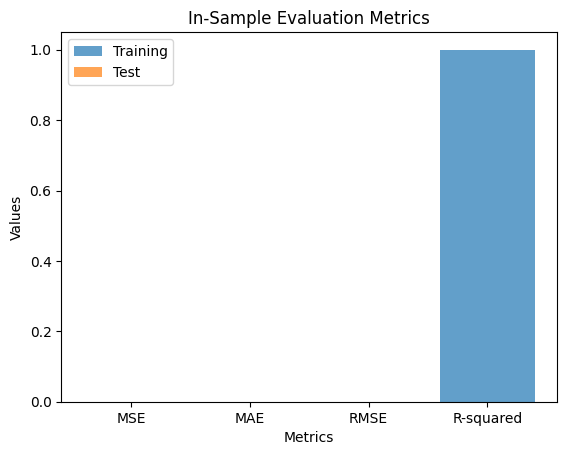

In [16]:
# Plot the results
metrics_names = ['MSE', 'MAE', 'RMSE', 'R-squared']
train_metrics = [mse_train, mae_train, rmse_train, r2_train]
test_metrics = [mse_test, mae_test, rmse_test, r2_test]

plt.bar(metrics_names, train_metrics, label='Training', alpha=0.7)
plt.bar(metrics_names, test_metrics, label='Test', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('In-Sample Evaluation Metrics')
plt.legend()
plt.show()